# Explore Weather

Create your own EDA below! Create as many code-blocks as you need.

Once you've completed your EDA, complete the section titled **Reflections** where you will answer questions about your EDA.

In [61]:
from scipy.stats import pearsonr
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticks
import plotly.express as px
import math

In [11]:
# import data
weather1 = pd.read_csv("../data/weather/weather_data1.csv")
weather2 = pd.read_csv("../data/weather/weather_data2.csv")

In [ ]:
# TODO: concatenate your data files together and save to a new csv file ("../data/weather/weather_concat.csv")
weather = pd.concat([weather1, weather2], ignore_index=True)
weather.to_csv("../data/weather/weather_concat.csv", index=False)

In [37]:
# TODO: view first 5 rows of your data
weather.head()

,year,rain_max,temp_avg,temp_max,temp_min,hum_max,hum_min,wind_max,wind_avg,subdivision
0,2006,6.670968,21.803087,27.190323,18.654839,97.129032,57.806452,9.706452,2.075207,Minas Gerais
1,2007,1.866250,23.040999,27.649375,18.753125,87.837500,48.493750,8.749375,2.069605,Minas Gerais
2,2008,3.777049,20.682400,27.000000,16.216393,96.136612,51.415301,8.865027,1.584408,Minas Gerais
3,2009,3.380220,21.023802,27.769231,16.410440,96.054945,49.329670,9.114286,1.611746,Minas Gerais
4,2010,2.183516,21.444293,28.580769,16.156044,95.247253,44.648352,9.109341,1.455907,Minas Gerais


In [16]:
# TODO: describe your numeric columns
weather.describe()

,year,rain_max,temp_avg,temp_max,temp_min,hum_max,hum_min,wind_max,wind_avg
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,2014.500000,3.175087,21.285831,28.198312,16.458525,96.502990,48.528039,8.469412,1.286295
std,5.338539,1.190658,0.549483,0.564714,0.891070,2.345644,3.010135,0.611327,0.399773
min,2006.000000,1.617582,20.682400,27.000000,15.268681,87.837500,44.648352,7.484426,0.812202
25%,2010.250000,2.342250,20.975602,27.811486,16.041470,96.079483,47.154325,7.906319,0.911424
50%,2014.500000,2.978022,21.126061,28.406027,16.319722,97.089241,48.450172,8.489286,1.216155
75%,2018.750000,3.718815,21.434377,28.614973,16.459066,97.553044,49.310440,8.946889,1.539160
max,2023.000000,6.670968,23.040999,29.010989,18.753125,98.500000,57.806452,9.706452,2.075207


### Notes from the descriptive statis/summary statistics:
- observation 1:
- observation 2:


In [17]:
# TODO: display the null values in your dataframe
weather.isnull().sum()

year           0
rain_max       0
temp_avg       0
temp_max       0
temp_min       0
hum_max        0
hum_min        0
wind_max       0
wind_avg       0
subdivision    0
dtype: int64

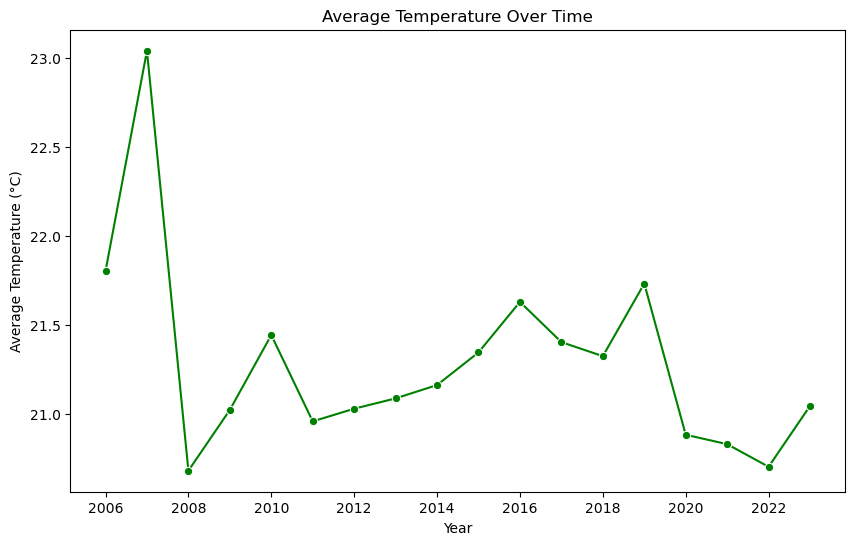

In [51]:
# TODO: BEGIN YOUR EDA!
# Average temparature over time.
plt.figure(figsize=(10, 6))
sns.lineplot(data=weather, x="year", y="temp_avg", marker="o", color="green")
plt.title("Average Temperature Over Time")
plt.xlabel("Year")
plt.ylabel("Average Temperature (°C)")
plt.gca().xaxis.set_major_locator(ticks.MultipleLocator(2))

### Notes from line plot:
- observation 1:
- observation 2:


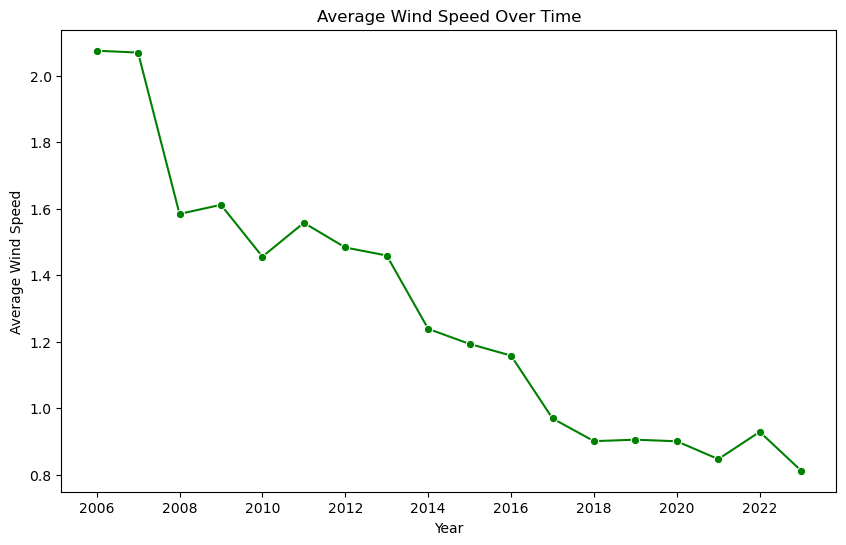

In [52]:
# Average wind speed over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=weather, x="year", y="wind_avg", marker='o', color="green")
plt.title("Average Wind Speed Over Time")
plt.xlabel("Year")
plt.ylabel("Average Wind Speed")
plt.gca().xaxis.set_major_locator(ticks.MultipleLocator(2))

### Notes from line plot:
- observation 1:
- observation 2:


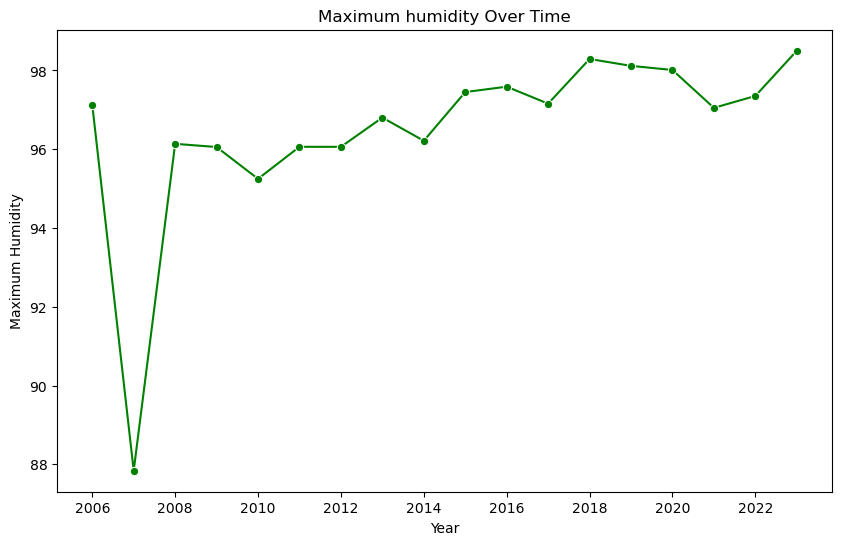

In [53]:
# Average wind speed over time.
plt.figure(figsize=(10, 6))
sns.lineplot(data=weather, x="year", y="hum_max", marker='o', color="green")
plt.title("Maximum humidity Over Time")
plt.xlabel("Year")
plt.ylabel("Maximum Humidity")
plt.gca().xaxis.set_major_locator(ticks.MultipleLocator(2))

### Notes from line plot:
- observation 1:
- observation 2:


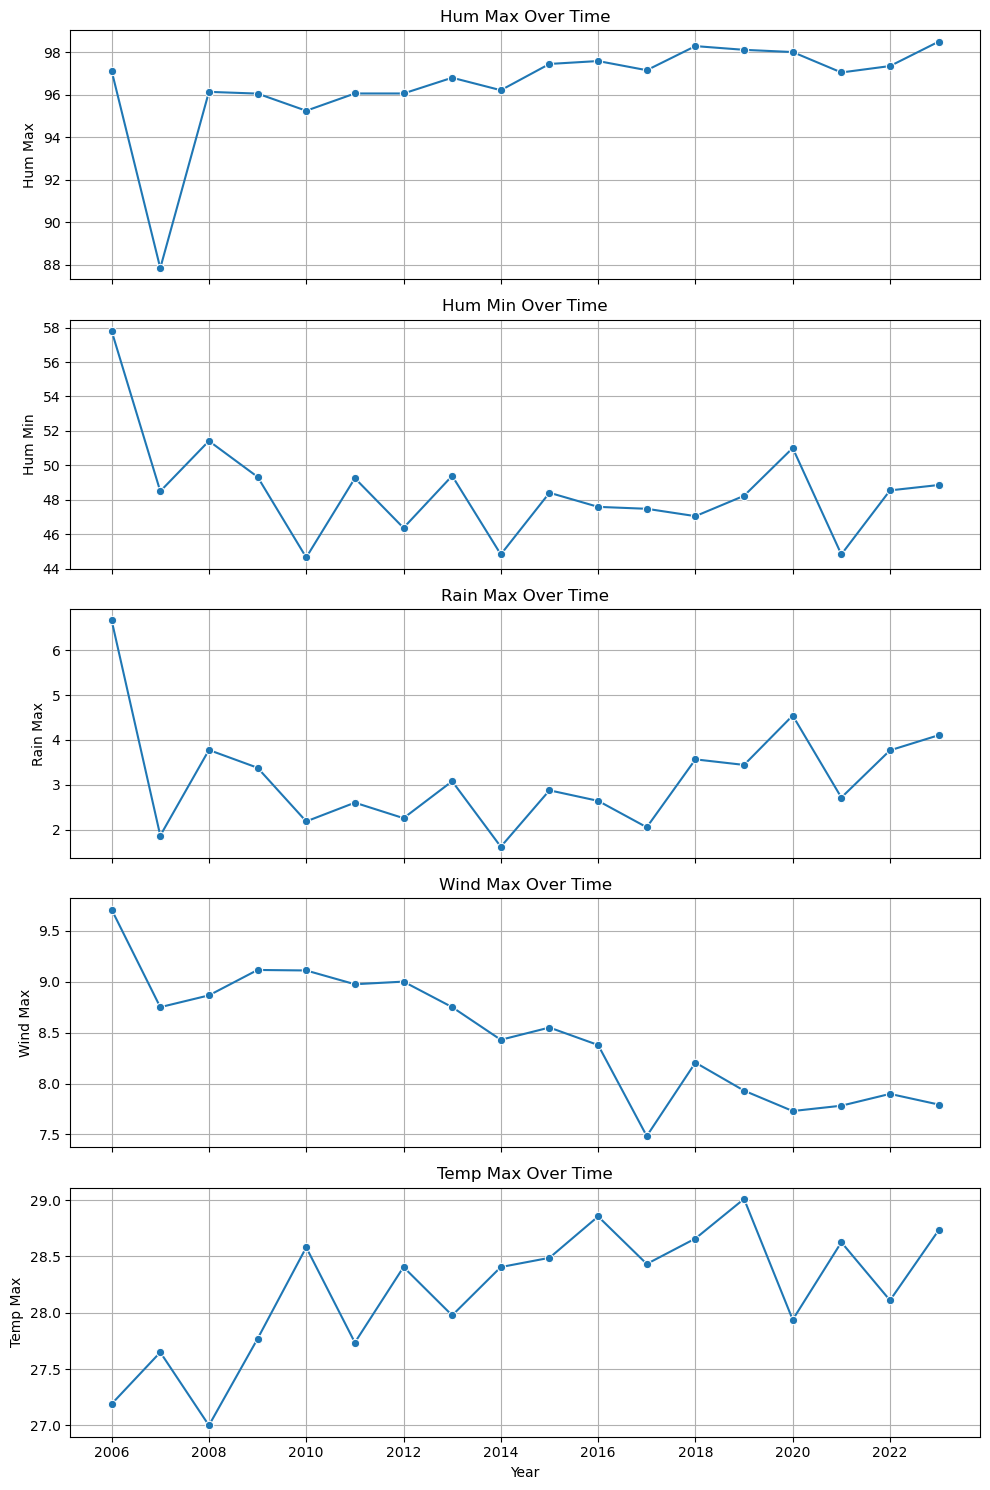

In [58]:
# Two subplots: Maximum rain and maximum temperature over time
columns_to_plot = ['hum_max', 'hum_min', 'rain_max', 'wind_max', 'temp_max']
fig, axs = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(10, 3 * len(columns_to_plot)), sharex=True)
# Loop through each column and its corresponding subplot axis
for ax, column in zip(axs, columns_to_plot):
    sns.lineplot(x='year', y=column, data=weather, ax=ax, marker='o')
    ax.set_ylabel(column.replace('_', ' ').title())
    ax.set_title(f'{column.replace("_", " ").title()} Over Time')
    ax.grid(True)
    ax.xaxis.set_major_locator(ticks.MultipleLocator(2))

# Set common x-label
plt.xlabel('Year')
plt.tight_layout()
plt.show()
    

### Notes from line plot:
- observation 1:
- observation 2:


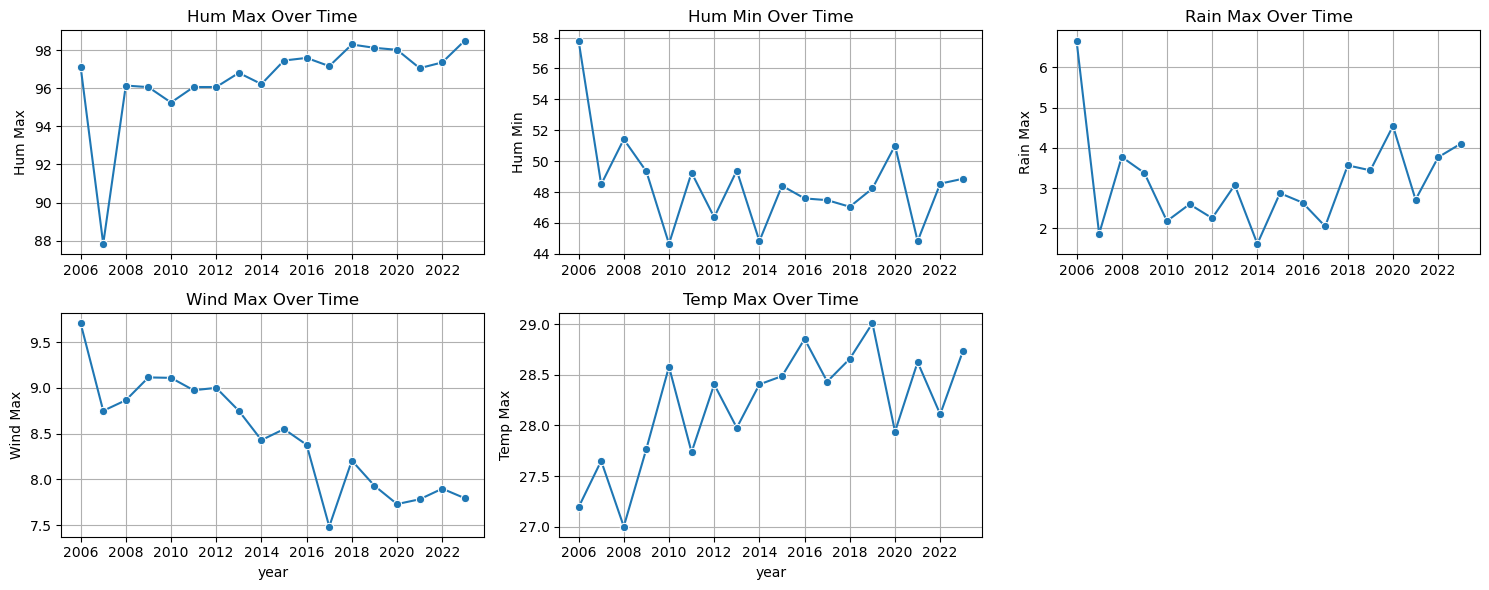

In [79]:

# Columns from which to choose 
columns_to_plot = ['hum_max', 'hum_min', 'rain_max', 'wind_max', 'temp_max']
n = len(columns_to_plot)

# Grid layout: 2 rows should be enough cols to fit plots
# Calculate number of columns needed based on number of plots
ncols = math.ceil(n / 2)
nrows = 2

# Create subplots with specified number of rows and columns
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5 * ncols, 6), sharex=True)

# Flatten the 2D axes array for easy looping
axs = axs.flatten()

# Plot each column
for i, column in enumerate(columns_to_plot):
    sns.lineplot(x='year', y=column, data=weather, ax=axs[i], marker='o')
    axs[i].set_title(f"{column.replace('_', ' ').title()} Over Time")
    axs[i].set_ylabel(column.replace('_', ' ').title())
    axs[i].grid(True)
    
# Ensure all subplots show x-axis year labels
for ax in axs:
    ax.tick_params(labelbottom=True)
    ax.xaxis.set_major_locator(ticks.MultipleLocator(2))

# Remove any unused axes
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

### Notes from line plot:
- observation 1:
- observation 2:


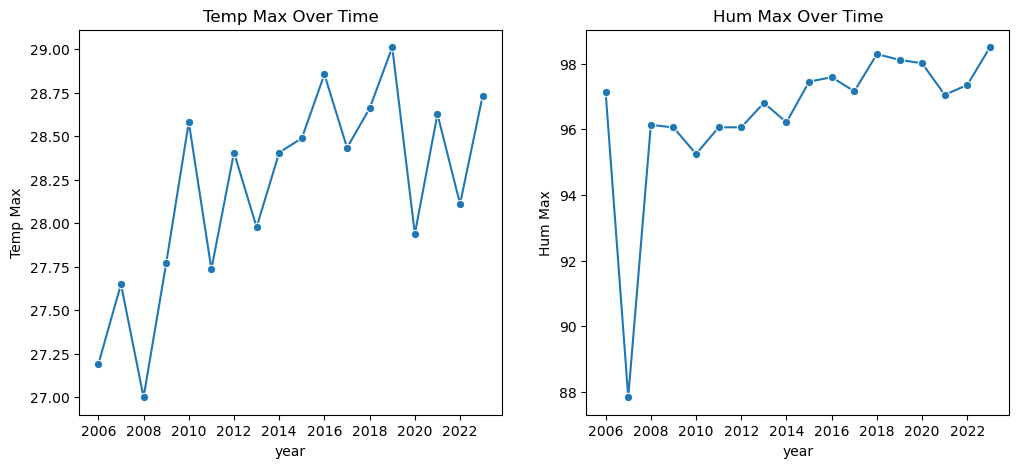

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5), sharex=True)

columns_to_plot = ['temp_max', 'hum_max']
for i, column in enumerate(columns_to_plot):
    sns.lineplot(x='year', y=column, data=weather, ax=axs[i], marker='o')
    axs[i].set_title(f"{column.replace('_', ' ').title()} Over Time")
    axs[i].set_ylabel(column.replace('_', ' ').title())
    axs[i].tick_params(labelbottom=True)
    
# Ensure all subplots show x-axis year labels
for ax in axs:
    ax.tick_params(labelbottom=True)
    ax.xaxis.set_major_locator(ticks.MultipleLocator(2))


### Notes from line plots:
- observation 1:
- observation 2:


## Reflections

Answer each question based on the visualizations that you've generated.

Remember, you must justify your answers with proof! Look back to W6D3 for more context.

How is average temperature changing across the years for Minas Gerais? Is this increasing or decreasing?

Answer here

How is minimum humidity changing across the years for Minas Gerais? Is this increasing or decreasing?

Answer here

How is average wind speed changing across the years for Minas Gerais? Is this increasing or decreasing?

Answer here

Which year had the highest maximum record rainfall?

Answer here

What is the relationship between max rain and max humidity? How *strong* is this relationship? Use pearson's correlation coefficient.

Answer here

What is the relationship between average wind speed and average temperature? How *strong* is this relationship? Use pearson's correlation coefficient.

Answer here